# Do students program more as a hobby than professional developers?

My intuition tells me that developers that are already working and coding are less interested in programming as a hobby. Students may be more interested as that practice could also be used to learn and improve.

In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#load the data
df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#get only the students
students = df[df['Professional'] == 'Student']
studentshobby = students['ProgramHobby']
studentshobby = studentshobby.reset_index()
studentshobby

,index,ProgramHobby
0,0,"Yes, both"
1,1,"Yes, both"
2,5,"Yes, both"
3,43,"Yes, I program as a hobby"
4,45,"Yes, both"
...,...,...
8219,51367,"Yes, both"
8220,51369,"Yes, I program as a hobby"
8221,51376,"Yes, I program as a hobby"
8222,51379,"Yes, I program as a hobby"


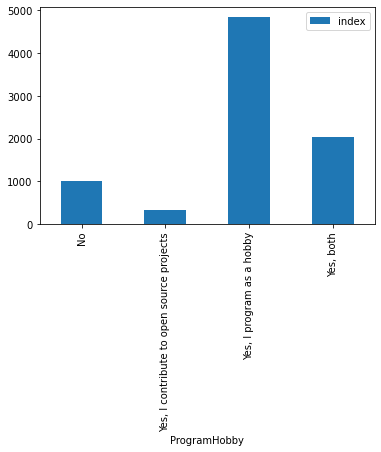

In [3]:
#group the students
studentshobbygrouped = studentshobby.groupby('ProgramHobby').count().reset_index()

#create the plot
studentshobbygrouped.plot(kind='bar', x='ProgramHobby')

In [4]:
#students that program as a hobby and contribute to open source
both = np.sum(studentshobby['ProgramHobby'] == 'Yes, both')

#students that only program as a hobby
program = np.sum(studentshobby['ProgramHobby'] == 'Yes, I program as a hobby')

#all students
total = studentshobby.shape[0]

var = both + program

#percentage of students that program as a hobby
var/total

0.8358463035019456

In [5]:
#students that contribute to open source
opensource = np.sum(studentshobby['ProgramHobby'] == 'Yes, I contribute to open source projects')

var = both + opensource

#percentage of students that contribute to open source
var/total

0.28720817120622566

In [6]:
#get only the devs
devs = df[df['Professional'] == 'Professional developer']
devshobby = devs['ProgramHobby']
devshobby = devshobby.reset_index()
devshobby

,index,ProgramHobby
0,2,"Yes, both"
1,4,"Yes, I program as a hobby"
2,7,"Yes, both"
3,8,"Yes, I program as a hobby"
4,9,"Yes, I program as a hobby"
...,...,...
36126,51384,No
36127,51386,"Yes, both"
36128,51387,"Yes, I program as a hobby"
36129,51389,"Yes, I program as a hobby"


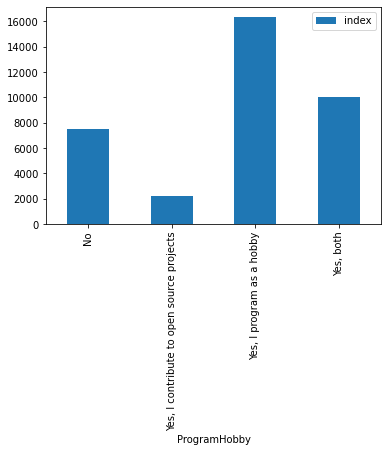

In [7]:
#group the devs
devshobbygrouped = devshobby.groupby('ProgramHobby').count().reset_index()

#create the plot
devshobbygrouped.plot(kind='bar', x='ProgramHobby')

In [8]:
#devs that program as a hobby and contribute to open source
both = np.sum(devshobby['ProgramHobby'] == 'Yes, both')

#devs that only program as a hobby
program = np.sum(devshobby['ProgramHobby'] == 'Yes, I program as a hobby')

var = both + program

#all the devs
total = devshobby.shape[0]

#percentage of devs that program as a hobby
var/total

0.7294566992333453

In [9]:
#devs that contribute to open source
opensource = np.sum(devshobby['ProgramHobby'] == 'Yes, I contribute to open source projects')

var = both + opensource

var/total

0.3394315131050898

# Summary

- Students that program as a hobby: 83.5%
- Devs that program as a hobby: 72.9%
- Students that contribute to open source: 28.7%
- Devs that contribute to open source: 33.9%

Looking at this percentages we can conclude that devs program less as a hobby than students, confirming what I thought at first. We can also see that devs contribute more to open source than students, which makes sense since devs have more experience and skills to help in a real-world project.